### Introduction
* Sequence of operation applied to matrix of input data
* These operation are usually collections of additions & multiplications
* The important trick with neural networks is called 'backpropagation'. Back propagation is a procedure that allows us to update the model variables based on the learning rate and the output of the loss function. 
* Another important feature to take note of in neural networks is the non-linear activation function. Since most neural networks are just combinations of addition and multiplication operations, they will not be able to model non-linear datasets. To address this issue, we have used the non-linear activation functions in the neural networks. This will allow the neural network to adapt to most non-linear situations.

### Implementaing Operational Gates
<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_01.jpg">

In [47]:
#We start off by loading TensorFlow and creating a graph session:

import tensorflow as tf
sess = tf.Session()

In [48]:
#Now, we declare our model variable, input data, and placeholder. 
#We make our input data equal to the value 5, so that the multiplication factor to get 50 will be 10 (that is, 5X10=50):


a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [49]:
#Next we add the operation to our computational graph:

multiplication = tf.multiply(a, x_data)

In [50]:
#We will declare the loss function as the L2 distance between the output and the desired target value of 50:

loss = tf.square(tf.subtract(multiplication, 50.))

In [51]:
#Now we initialize our model variable and declare our optimizing algorithm as the standard gradient descent:

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [52]:
#We can now optimize our model output towards the desired value of 50. 
#We do this by continually feeding in the input value of 5 and back propagating the loss to update the model variable towards the value of 10:


print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    a_val_old = sess.run(a)
    print(a_val_old)
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
4.0
7.0 * 5.0 = 35.0
7.0
8.5 * 5.0 = 42.5
8.5
9.25 * 5.0 = 46.25
9.25
9.625 * 5.0 = 48.125
9.625
9.8125 * 5.0 = 49.0625
9.8125
9.90625 * 5.0 = 49.5313
9.90625
9.95313 * 5.0 = 49.7656
9.95313
9.97656 * 5.0 = 49.8828
9.97656
9.98828 * 5.0 = 49.9414
9.98828
9.99414 * 5.0 = 49.9707


### We will do the same for f(x)= a.x + b

In [53]:
#We will start in exactly same way as the preceding example, except now we'll initialize two model variables, a and b:

from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [54]:
#Initialize two model variables a,b
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

In [55]:
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [56]:
two_gate = tf.add(tf.multiply(a,x_data),b)

In [57]:
loss = tf.square(tf.sub(two_gate,50))

AttributeError: module 'tensorflow' has no attribute 'sub'

In [ ]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
sess.run(init)

In [ ]:
#We now optimize the model variables to train the output towards the target value of 50:

print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    # Run the train step
    sess.run(train_step, feed_dict={x_data: x_val})
    # Get the a and b values
    a_val, b_val = (sess.run(a), sess.run(b))
    # Run the two-gate graph output
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))

#### Working with Gates and Activation Functions
<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_11.jpg">

* Create two layer neural network - one layer through sigmoid function & another layer reLU
* Loss function will be governed by L2 distance from 0.75
* We will randomly pull data from normal distribution
* Optimize towards 0.75

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [ ]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [ ]:
x

In [ ]:
# Start Graph Session
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [ ]:
# Declare the loss function as the difference between
# the output and a target value, 0.75.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [ ]:

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [ ]:
# Run loop across gate
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    
    x_vals = np.transpose([x[rand_indices]])
    
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))

In [ ]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
### Implementing a One-Layer Neural Network

In [59]:
from sklearn import datasets

In [70]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [71]:
y_vals

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.4,  0.3,  0.2,  0.2,  0.1,  0.2,
        0.2,  0.1,  0.1,  0.2,  0.4,  0.4,  0.3,  0.3,  0.3,  0.2,  0.4,
        0.2,  0.5,  0.2,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.4,  0.1,
        0.2,  0.1,  0.2,  0.2,  0.1,  0.2,  0.2,  0.3,  0.3,  0.2,  0.6,
        0.4,  0.3,  0.2,  0.2,  0.2,  0.2,  1.4,  1.5,  1.5,  1.3,  1.5,
        1.3,  1.6,  1. ,  1.3,  1.4,  1. ,  1.5,  1. ,  1.4,  1.3,  1.4,
        1.5,  1. ,  1.5,  1.1,  1.8,  1.3,  1.5,  1.2,  1.3,  1.4,  1.4,
        1.7,  1.5,  1. ,  1.1,  1. ,  1.2,  1.6,  1.5,  1.6,  1.5,  1.3,
        1.3,  1.3,  1.2,  1.4,  1.2,  1. ,  1.3,  1.2,  1.3,  1.3,  1.1,
        1.3,  2.5,  1.9,  2.1,  1.8,  2.2,  2.1,  1.7,  1.8,  1.8,  2.5,
        2. ,  1.9,  2.1,  2. ,  2.4,  2.3,  1.8,  2.2,  2.3,  1.5,  2.3,
        2. ,  2. ,  1.8,  2.1,  1.8,  1.8,  1.8,  2.1,  1.6,  1.9,  2. ,
        2.2,  1.5,  1.4,  2.3,  2.4,  1.8,  1.8,  2.1,  2.4,  2.3,  1.9,
        2.3,  2.5,  2.3,  1.9,  2. ,  2.3,  1.8])

In [72]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [73]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

#Converting data in range of 0 - 1
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [74]:
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_04.jpg">

In [75]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [76]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2),
b2))

In [77]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [78]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [79]:
# First we initialize the loss vectors for storage.
loss_vec = []
test_loss = []
for i in range(500):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 2.2276
Generation: 100. Loss = 1.9738
Generation: 150. Loss = 2.455
Generation: 200. Loss = 2.1724
Generation: 250. Loss = 1.9766
Generation: 300. Loss = 2.7586
Generation: 350. Loss = 1.7948
Generation: 400. Loss = 1.5586
Generation: 450. Loss = 2.1508
Generation: 500. Loss = 2.0444


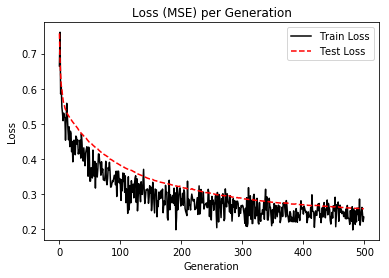

In [75]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_04.jpg">

### Implementing Different Layers
* There are more types of layers that are built-in functions inside TensorFlow. 
* The most popular layers that are used are convolutional layers and maxpool layers. 
* Create such layers with input data & with fully connected layers

In [78]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

In [79]:
data_size = 25
data_1d = np.random.normal(size=data_size)
x_input_1d = tf.placeholder(dtype=tf.float32, shape=[data_size])

* Define function that will make a convolutional layer. 
* Define a random filter & create convolutional layer

In [81]:
def conv_layer_1d(input_1d, my_filter):
    # Make 1d input into 4d [batch size, width, height, channels]
    #Modify input data & output data to extend or collapse the extra dim needed
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Perform convolution
    convolution_output = tf.nn.conv2d(input_4d, filter=my_filter, strides=[1,1,1,1], padding="VALID")
    # Now drop extra dimensions
    conv_output_1d = tf.squeeze(convolution_output)
    return(conv_output_1d)

my_filter = tf.Variable(tf.random_normal(shape=[1,5,1,1]))
my_convolution_output = conv_layer_1d(x_input_1d, my_filter)

In [85]:
input_2d = tf.expand_dims(data_1d, 0)

In [88]:
input_3d = tf.expand_dims(input_2d, 0)

In [90]:
tf.expand_dims(input_3d, 3)

<tf.Tensor 'ExpandDims_8:0' shape=(1, 1, 25, 1) dtype=float64>

In [91]:
### TensorFlow's activation functions will act element-wise by default
def activation(input_1d):
    return(tf.nn.relu(input_1d))
my_activation_output = activation(my_convolution_output)

In [93]:
def max_pool(input_1d, width):
    # First we make the 1d input into 4d.
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    # Perform the max pool operation
    pool_output = tf.nn.max_pool(input_4d, ksize=[1, 1, width, 1], strides=[1, 1, 1, 1], padding='VALID')
    pool_output_1d = tf.squeeze(pool_output)
    return(pool_output_1d)

my_maxpool_output = max_pool(my_activation_output, width=5)

In [94]:
def fully_connected(input_layer, num_outputs):
    # Create weights
    weight_shape = tf.squeeze(tf.pack([tf.shape(input_layer), [num_outputs]]))
    weight = tf.random_normal(weight_shape, stddev=0.1)
    bias = tf.random_normal(shape=[num_outputs])
    # Make input into 2d
    input_layer_2d = tf.expand_dims(input_layer, 0)
    # Perform fully connected operations
    full_output = tf.add(tf.matmul(input_layer_2d, weight), bias)
    # Drop extra dimensions
    full_output_1d = tf.squeeze(full_output)
    return(full_output_1d)


In [95]:
my_full_output = fully_connected(my_maxpool_output, 5)

In [99]:
init = tf.initialize_all_variables()
sess.run(init)
feed_dict = {x_input_1d: data_1d}
# Convolution Output
print('Input = array of length 25')
print('Convolution w/filter, length = 5, stride size = 1, results in an array of length 21:')
print(sess.run(my_convolution_output, feed_dict=feed_dict))
# Activation Output
print('\nInput = the above array of length 21')
print('ReLU element wise returns the array of length 21:')
print(sess.run(my_activation_output, feed_dict=feed_dict))
# Maxpool Output
print('\nInput = the above array of length 21')
print('MaxPool, window length = 5, stride size = 1, results in the array of length 17:')
print(sess.run(my_maxpool_output, feed_dict=feed_dict))
# Fully Connected Output
print('\nInput = the above array of length 17')
print('Fully connected layer on all four rows with five outputs:')
print(sess.run(my_full_output, feed_dict=feed_dict))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Input = array of length 25
Convolution w/filter, length = 5, stride size = 1, results in an array of length 21:
[  3.68702888e-01  -1.71500611e+00   1.12007046e+00  -3.17530465e+00
   1.24583697e+00   1.10787702e+00   2.95928121e-03   3.04242730e+00
  -1.09590828e+00   3.72558057e-01   2.00997210e+00  -1.03314447e+00
   2.21650958e+00   1.91677201e+00   2.72375441e+00   1.53702784e+00
  -1.78274453e-01   2.85260350e-01  -5.48149049e-01  -6.39494002e-01
  -2.69923806e-01]

Input = the above array of length 21
ReLU element wise returns the array of length 21:
[  3.68702888e-01   0.00000000e+00   1.12007046e+00   0.00000000e+00
   1.24583697e+00   1.10787702e+00   2.95928121e-03   3.04242730e+00
   0.00000000e+00   3.72558057e-01   2.00997210e+00   0.00000000e+00
   2.21650958e+00   1.91677201e+00   2.72375441e+00   1.53702784e+00
   0.00000000e+00   2.85260350e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00